# AIRCRAFT RISK ANALYSIS
****


## OVERVIEW
This project analyzes aviation accidents from the National Transportation Safety Board(NTSB), covering incidents from 1962 to 2023.
The goal is to identify low risk aircrafts that the company can consider for purchase as it ventures into commercial and private entrprise by
cleaning, sorting, grouping, aggregatting data, we extract insight for strategic decision making of aircraft acquisiotion. 

## BUSINESS PROBLEM
The company is entering the aviation industry. However, they lack insight into the historical safety performance of different aircraft.
The goal of this analysis is to identify aircrafts with low accidents, considering the given factors 
and provide recommendations on the safest and suitable aircrafts.   

## DATA UNDERSTANDING
The dataset comes from [National Transportation Safety Board(NTSB)](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) and contains aviation accidents from 1962 to 2023.
the dataset contain information on:<br>
1. 'Event'.'Date': Date of the incident,accident
2.  'Make', 'Model': manufacturer and aircraft model
3. 'Injury Severity' : Fatal, Serious, minor injuries
4. 'Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjered'
5. 'Purpose of flight': Purpose such as business, personal
6. 'Weather condition'
7. 'Broad phase of flight' : such as Takeoff, cruise, landing...
8. 'Aircraft damage': extent of damage of the the aircraft
9. 'Engine Type', ''Number of Engines'

The key measure variables used are:<br>
* 'Total.Fatal.Injuries': accidents that caused death
* 'Total.serious.Injuries' : accidents that caused servier injuries
* 'Total.Minor.Injuries' : accidents that caused minor injuries
* 'Total.Uninjered' : accidents that did not cause injuries




                    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("~/Desktop/Phase 1 Project/data/AviationData.csv", encoding = "ISO-8859-1",low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.shape

(88889, 31)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


## DATA PREPARATION


## Data Cleaning

Filling NaN values with UNKNOWN in the relevant columns

In [5]:
df["Model"] = df["Model"].fillna("Unknown").str.upper()
df["Make"] = df["Make"].fillna("Unknown").str.upper()
df["Make_Model"] = df["Make"].str.upper().str.strip()+ " " +df["Model"].str.upper().str.strip()
df["Purpose.of.flight"]=df["Purpose.of.flight"].fillna("Unknown").str.upper().str.strip()
df["Number.of.Engines"]=df["Number.of.Engines"].fillna("Unk")
df["Weather.Condition"]=df["Weather.Condition"].fillna("Unknown").str.upper().str.strip()

Droping columns that are irrelevant and mostly empty.

In [6]:

df.drop(columns=[
    'Event.Id','Accident.Number','Airport.Name','Airport.Code',
    'Latitude','Longitude','Registration.Number','FAR.Description',
    'Schedule','Air.carrier','Report.Status','Publication.Date',
    'Country'], inplace = True)


In [7]:
df.columns

Index(['Investigation.Type', 'Event.Date', 'Location', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Make_Model'],
      dtype='object')

Filling missing values in the (['Total Fatal Injuries'],['Total Serious Injuries'],['Total Minor Injuries'],['Total Uninjered']) columns with 0

In [8]:

df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']] = df[
['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].fillna(0)
df

,Investigation.Type,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Make_Model
0,Accident,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,STINSON,108-3,No,1.0,Reciprocating,PERSONAL,2.0,0.0,0.0,0.0,UNK,Cruise,STINSON 108-3
1,Accident,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,PIPER,PA24-180,No,1.0,Reciprocating,PERSONAL,4.0,0.0,0.0,0.0,UNK,Unknown,PIPER PA24-180
2,Accident,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,CESSNA,172M,No,1.0,Reciprocating,PERSONAL,3.0,0.0,0.0,0.0,IMC,Cruise,CESSNA 172M
3,Accident,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,ROCKWELL,112,No,1.0,Reciprocating,PERSONAL,2.0,0.0,0.0,0.0,IMC,Cruise,ROCKWELL 112
4,Accident,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,CESSNA,501,No,Unk,NaN,PERSONAL,1.0,2.0,0.0,0.0,VMC,Approach,CESSNA 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",Minor,NaN,NaN,PIPER,PA-28-151,No,Unk,NaN,PERSONAL,0.0,1.0,0.0,0.0,UNKNOWN,NaN,PIPER PA-28-151
88885,Accident,2022-12-26,"Hampton, NH",NaN,NaN,NaN,BELLANCA,7ECA,No,Unk,NaN,UNKNOWN,0.0,0.0,0.0,0.0,UNKNOWN,NaN,BELLANCA 7ECA
88886,Accident,2022-12-26,"Payson, AZ",Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,PERSONAL,0.0,0.0,0.0,1.0,VMC,NaN,AMERICAN CHAMPION AIRCRAFT 8GCBC
88887,Accident,2022-12-26,"Morgan, UT",NaN,NaN,NaN,CESSNA,210N,No,Unk,NaN,PERSONAL,0.0,0.0,0.0,0.0,UNKNOWN,NaN,CESSNA 210N


## Data Analysis

Analyzing the Top 10 aircraft make by number of incidents so that I understand which aircraft make had the highest accidents

Text(0, 0.5, 'Aircraft Make')

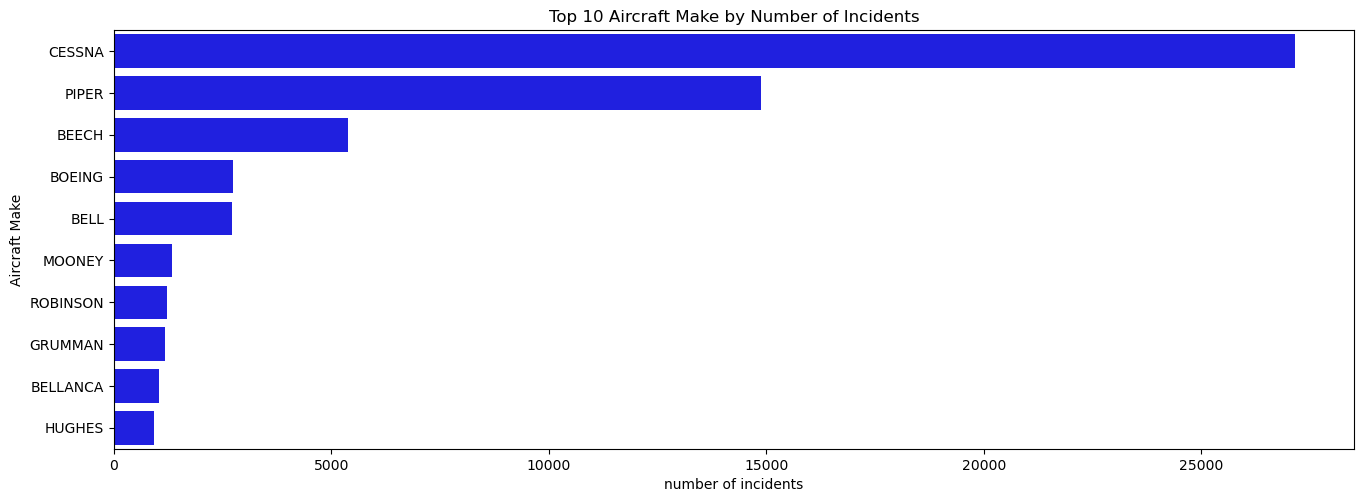

In [9]:
Top_aircraft_make = df["Make"].value_counts().head(10)
# plot of aircraft "make" by incident count
plt.figure(figsize=(16,25))
plt.subplot(4,1,1)
sns.barplot(x=Top_aircraft_make.values, y=Top_aircraft_make.index, color = "blue")
plt.title("Top 10 Aircraft Make by Number of Incidents")
plt.xlabel("number of incidents")
plt.ylabel("Aircraft Make")
           

Merging Make and Model columns, to distinguish aircrafts with the same Make by using its Model type 

Text(0, 0.5, 'Aircraft Make + Model')

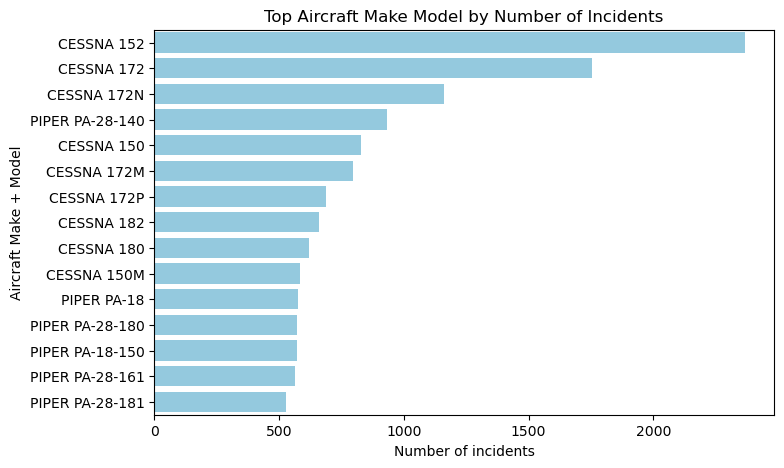

In [10]:
df["Make_Model"] = df["Make"].str.upper().str.strip()+ " " +df["Model"].str.upper().str.strip()
top_make_model = df["Make_Model"].value_counts().head(15)

#ploting top 10 [Make_Model] by count of incidents
plt.figure(figsize=(8,5))
sns.barplot(x=top_make_model.values, y=top_make_model.index,color="skyblue")
plt.title("Top Aircraft Make Model by Number of Incidents")
plt.xlabel("Number of incidents")
plt.ylabel("Aircraft Make + Model")

Analyzing which aircraft Make-Model had the lowest accidents rates

Text(0, 0.5, 'Aircraft Make + Model')

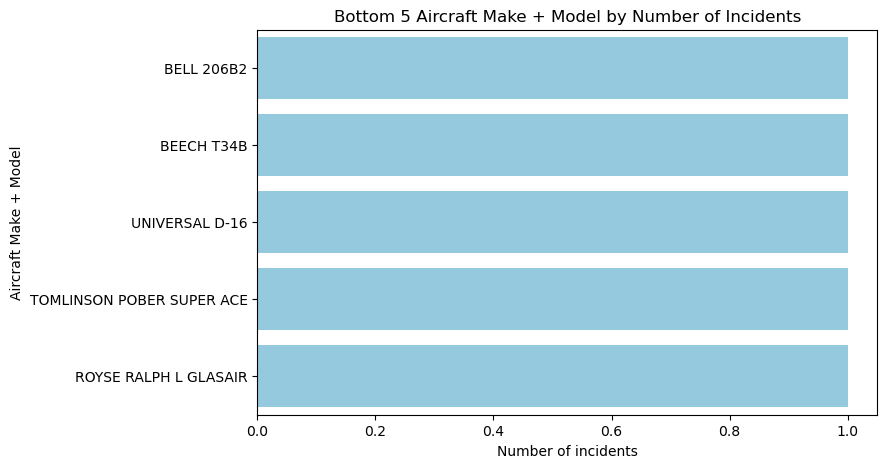

In [11]:

bottom_make_model = df["Make_Model"].value_counts().tail()

#ploting top 10 [Make_Model] by count of incidents
plt.figure(figsize=(8,5))
sns.barplot(x=bottom_make_model.values, y=bottom_make_model.index,color="skyblue")
plt.title("Bottom 5 Aircraft Make + Model by Number of Incidents")
plt.xlabel("Number of incidents")
plt.ylabel("Aircraft Make + Model")

Grouping Make-Model and Total Fatal Injuries columns to find the sum on each column so that I can understand which aircraft make-model have the highest fatality rate.

Text(0, 0.5, 'Aircraft by Make_Model')

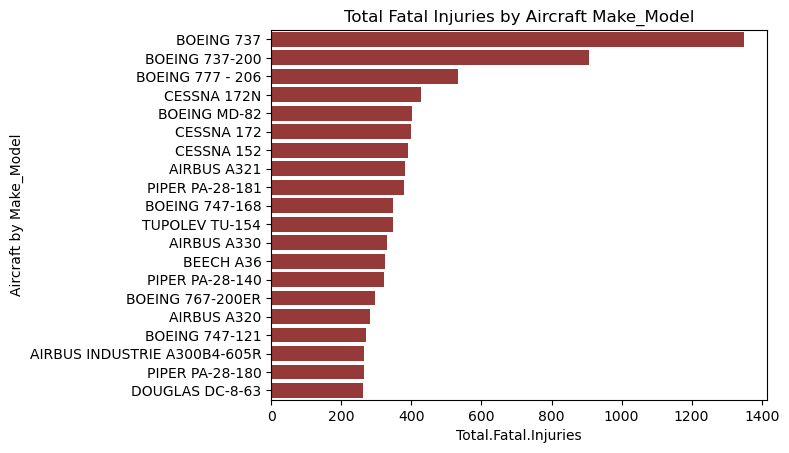

In [12]:
# Fatality rate by make and model

fatality_by_make_model = df.groupby("Make_Model")["Total.Fatal.Injuries"].sum().sort_values(ascending = False).head(20)
sns.barplot(x=fatality_by_make_model.values, y=fatality_by_make_model.index, color ="brown")
plt.title("Total Fatal Injuries by Aircraft Make_Model")
plt.xlabel("Total.Fatal.Injuries")
plt.ylabel("Aircraft by Make_Model")

Analyzing the Purpose of flight by incidents counts

Text(0, 0.5, 'purpose of flight')

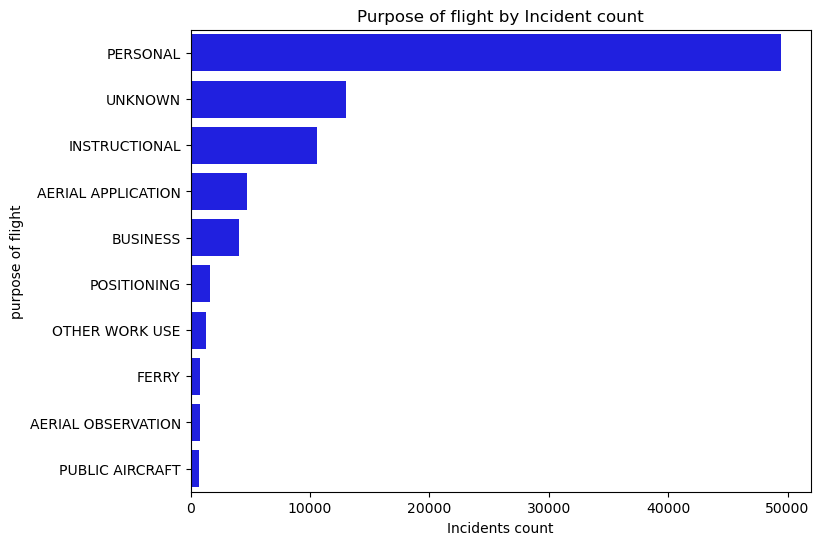

In [13]:

purpose_flight = df["Purpose.of.flight"].value_counts().head(10)

# ploting graph
plt.figure(figsize=(8,6))
sns.barplot(x=purpose_flight.values, y=purpose_flight.index,color="blue")
plt.title("Purpose of flight by Incident count")
plt.xlabel("Incidents count")
plt.ylabel("purpose of flight")        

Aircraft engines by Incident count

In [14]:
# Finding unique values in the Number of Engines column
df["Number.of.Engines"].unique()

array([1.0, 'Unk', 2.0, 0.0, 3.0, 4.0, 8.0, 6.0], dtype=object)

Text(0, 0.5, 'Incident count')

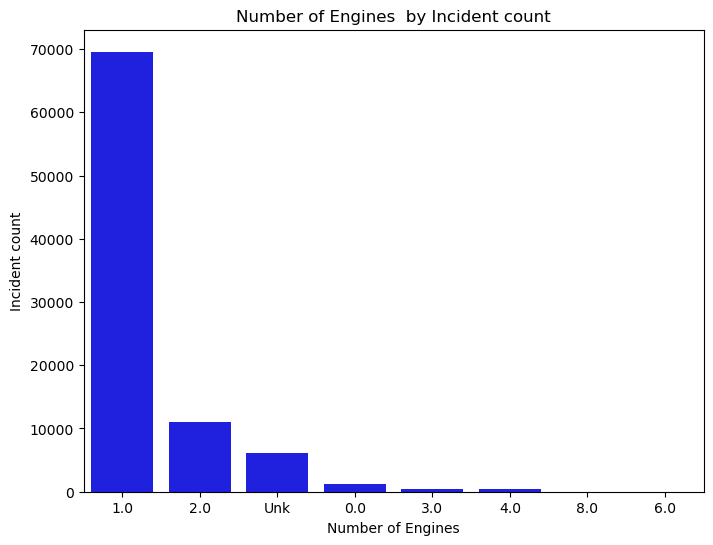

In [15]:
df["Number.of.Engines"]=df["Number.of.Engines"].fillna("Unk")

Engine_num=df["Number.of.Engines"].value_counts().head(13)

# ploting graph
plt.figure(figsize=(8,6))
sns.barplot(y=Engine_num.values, x=Engine_num.index,color="blue")
plt.title("Number of Engines  by Incident count")
plt.xlabel("Number of Engines")
plt.ylabel("Incident count") 
# plt.savefig("numberofengine.png", bbox_inches="tight")   


## Results

* From my first Data analysis of aircraft Model by the number of incidents, I figured that Cessna 152 model have the highest number of accident counts. Considering Piper, model PA-28-140 have the leading accident counts interms of Piper make.

* Comparing the Fatality rate agaist Make-Model, I figured that Boeing 737 model have the highest fatality rate, followed by Boeing 737-200 model.

* Personal flights like Cessna 152, 172, 172N models reported higher accident counts.

* Aircrafts with 1 number of engine showed the highest accident counts.

## conclusions

* Comparing the Fatality rate by Make-Model, Boeing 737 model showed the highest fatality rate. Boeing aircrafts are larger in size and are most commonly used for commercial services, they carry a lot more passengers compared to other aircrafts like Cessna, Piper, Beech. This increases the mortality rate with few accident counts. 

* Purpose of flight. Cessna 152 model reported the highest accident counts with reduced fatility rate, mainly because they are commonly used for personal reasons and carry fewer passengers compared to commercial aiplanes.

* Number of engine. aircrafts with multi-engines showed low accident counts compared to aircrafts with 1 engine, projecting the ability of an aircraft to continue flying after one engine failure.


## Recommendations

1. The company should invest in aircrafts with multi-engines i.e 2,3 engines as they show reduced accident rate from the analysis
2. For commercial airlines the company should take note of Boeing 737, 737-200 models high fatality rate and prefer other Boeing models. 
3. For personal airplanes the company should take note of Cessna 152 model highest accident counts and go with other models like Cessna 182, 150 models that display reduced accident counts